In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Draw scatter plot and see....improve it!!!!!!!

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Dataset Loading

In [26]:
df = pd.read_csv("/content/drive/MyDrive/IDC301/20122/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.shape

(891, 12)

### Dataset Preprocessing

In [28]:
# Removing unnessary columns

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [30]:
inputs = df.drop('Survived',axis='columns')

# Target variable columns drop -- Take only independent variable columns

In [31]:
target = df['Survived']
target

# Target column

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [32]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [33]:
# Using label encoder + Fit_tranform - converting the columns into numbers (understands comp.)

from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [34]:
inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])

In [35]:
inputs

,Pclass,Sex,Age,Fare,sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [36]:
inputs_n = inputs.drop(['Sex'], axis='columns')

In [37]:
inputs_n

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [38]:
inputs_n.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [39]:
inputs_n.Age = inputs_n.Age.fillna(inputs_n.Age.mean())

In [40]:
inputs_n[:10]

,Pclass,Age,Fare,sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
5,3,29.699118,8.4583,1
6,1,54.000000,51.8625,1
7,3,2.000000,21.0750,1
8,3,27.000000,11.1333,0
9,2,14.000000,30.0708,0


In [41]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Dataset Spliting

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.3)

In [43]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8097014925373134

In [44]:
y_predicted_lr = lr.predict(X_test)

In [45]:
print(classification_report(y_test, y_predicted_lr))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       163
           1       0.79      0.70      0.74       105

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



### Logistic Regression

In [46]:
cm = confusion_matrix(y_test, y_predicted_lr)
cm

array([[143,  20],
       [ 31,  74]])

Text(69.0, 0.5, 'Truth')

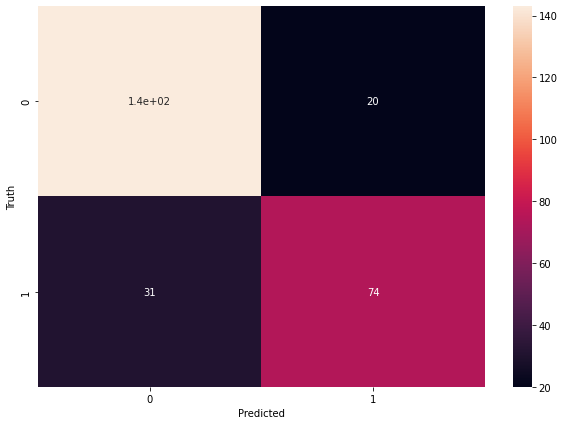

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7910447761194029

In [49]:
y_predicted_dt = dt.predict(X_test)

In [50]:
print(classification_report(y_test, y_predicted_dt))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       163
           1       0.76      0.68      0.72       105

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



### Decision Tree

In [51]:
cm = confusion_matrix(y_test, y_predicted_dt)
cm

array([[141,  22],
       [ 34,  71]])

Text(69.0, 0.5, 'Truth')

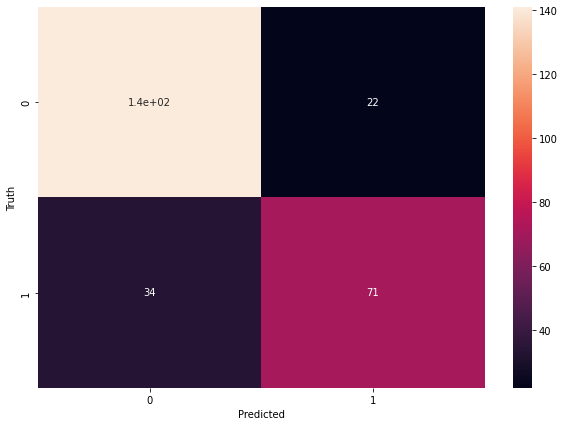

In [52]:
cm = confusion_matrix(y_test, y_predicted_dt)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8022388059701493

In [54]:
y_predicted_rf = rf.predict(X_test)

In [55]:
print(classification_report(y_test, y_predicted_rf))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       163
           1       0.79      0.68      0.73       105

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



### Random Forest

In [56]:
cm = confusion_matrix(y_test, y_predicted_rf)
cm

array([[144,  19],
       [ 34,  71]])

Text(69.0, 0.5, 'Truth')

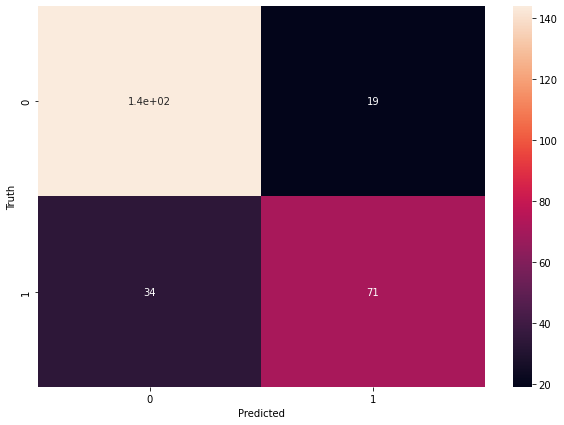

In [57]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')